<a href="https://colab.research.google.com/github/Gokulraj-123/CSA4724-Deep-Learning/blob/main/Deep_Learning_Pratical.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1

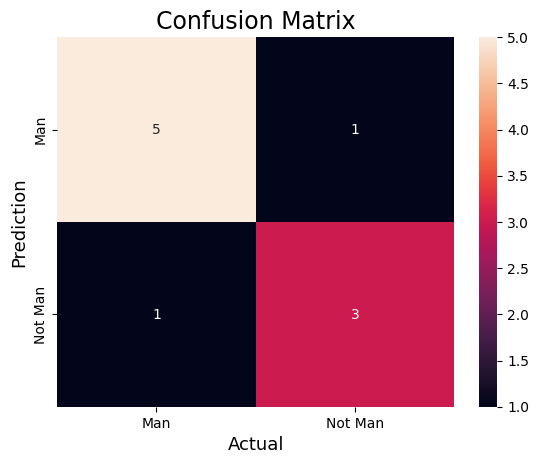

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
actual    = np.array(
  ['Man','Man','Man','Not Man','Man','Not Man','Man','Man','Not Man','Not Man'])
predicted = np.array(
  ['Man','Not Man','Man','Not Man','Man','Man','Man','Man','Not Man','Not Man'])

cm = confusion_matrix(actual,predicted)
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['Man','Not Man'],
            yticklabels=['Man','Not Man'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()


#2

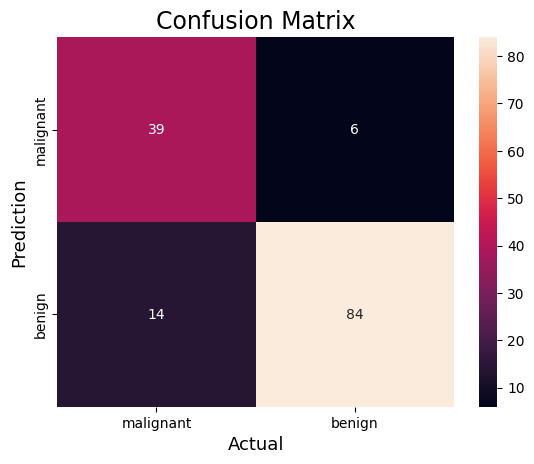

Accuracy   : 0.8601398601398601
Precision : 0.9333333333333333
Recall    : 0.8571428571428571
F1-score  : 0.8936170212765957


In [ ]:
#Import the necessary libraries
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
X, y= load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25)
tree = DecisionTreeClassifier(random_state=23)
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['malignant', 'benign'],
            yticklabels=['malignant', 'benign'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy   :", accuracy)
precision = precision_score(y_test, y_pred)
print("Precision :", precision)
recall = recall_score(y_test, y_pred)
print("Recall    :", recall)
F1_score = f1_score(y_test, y_pred)
print("F1-score  :", F1_score)


#3

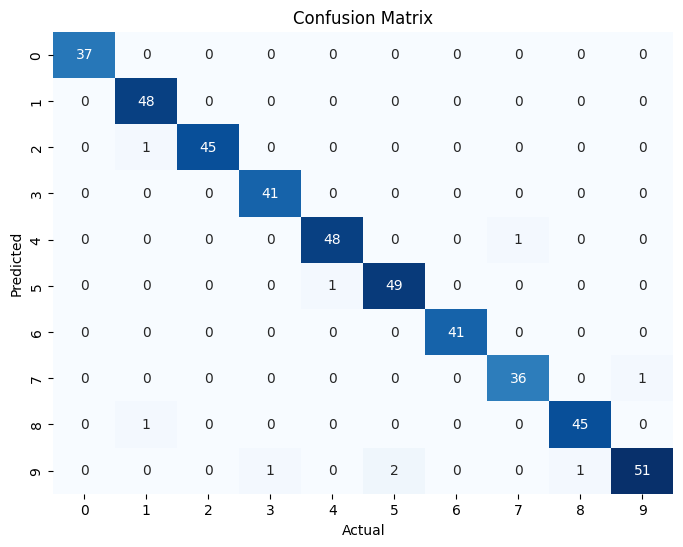

Accuracy:  0.98
Precision: 0.98
Recall:    0.98
F1-score:  0.98


In [ ]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

# Load the digits dataset
X, y = load_digits(return_X_y=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=23)

# Train the RandomForestClassifier model
clf = RandomForestClassifier(random_state=23)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False,
            xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

# Finding accuracy, precision, recall, and F1-score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:  {:.2f}".format(accuracy))
print("Precision: {:.2f}".format(precision))
print("Recall:    {:.2f}".format(recall))
print("F1-score:  {:.2f}".format(f1))

#4


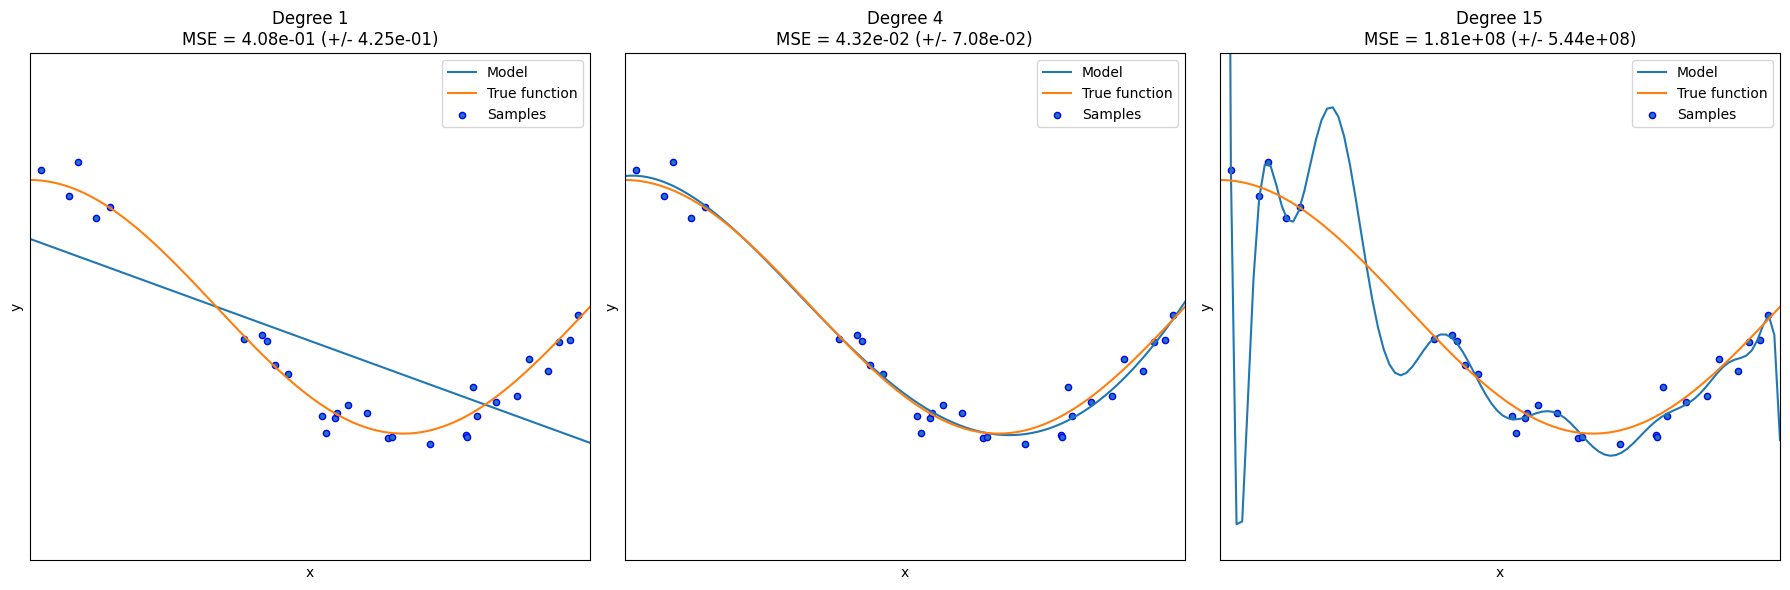

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

def true_fun(X):
    return np.cos(1.5 * np.pi * X)

np.random.seed(0)

n_samples = 30
degrees = [1, 4, 15]

X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

plt.figure(figsize=(18, 6))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([
        ("polynomial_features", polynomial_features),
        ("linear_regression", linear_regression)
    ])

    pipeline.fit(X[:, np.newaxis], y)

    # Evaluate the models using cross-validation
    scores = -1 * cross_val_score(pipeline, X[:, np.newaxis], y,
                                  scoring="neg_mean_squared_error", cv=10)

    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    plt.plot(X_test, true_fun(X_test), label="True function")
    plt.scatter(X, y, edgecolor="b", s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title(f"Degree {degrees[i]}\nMSE = {scores.mean():.2e} (+/- {scores.std():.2e})")

plt.tight_layout()
plt.show()

#4

Estimated coefficients:
b_0 = 1.2363636363636363            
b_1 = 1.1696969696969697


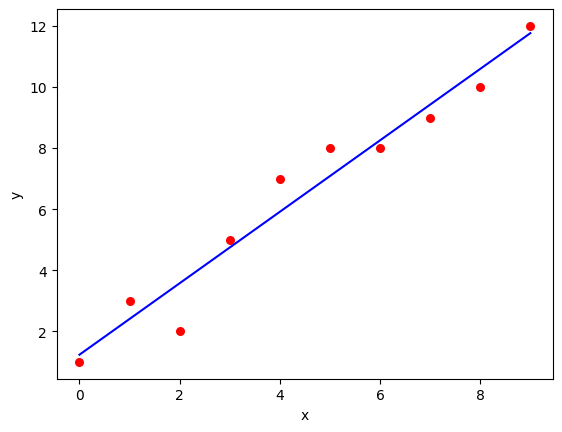

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def estimate_coef(x, y):
    # number of observations/points
    n = np.size(x)

    # mean of x and y vector
    m_x = np.mean(x)
    m_y = np.mean(y)

    # calculating cross-deviation and deviation about x
    SS_xy = np.sum(y*x) - n*m_y*m_x
    SS_xx = np.sum(x*x) - n*m_x*m_x

    # calculating regression coefficients
    b_1 = SS_xy / SS_xx
    b_0 = m_y - b_1*m_x

    return (b_0, b_1)

def plot_regression_line(x, y, b):
    # plotting the actual points as scatter plot
    plt.scatter(x, y, color = "r",
               marker = "o", s = 30)

    # predicted response vector
    y_pred = b[0] + b[1]*x

    # plotting the regression line
    plt.plot(x, y_pred, color = "b")

    # putting labels
    plt.xlabel('x')
    plt.ylabel('y')

    # function to show plot
    plt.show()

def main():
    # observations / data
    x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
    y = np.array([1, 3, 2, 5, 7, 8, 8, 9, 10, 12])

    # estimating coefficients
    b = estimate_coef(x, y)
    print("Estimated coefficients:\nb_0 = {}  \
          \nb_1 = {}".format(b[0], b[1]))

    # plotting regression line
    plot_regression_line(x, y, b)

if __name__ == "__main__":
    main()


#5